C:\Users\stacy\AppData\Local\Temp\ipykernel_19176\3182312053.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img);
C:\Users\stacy\AppData\Local\Temp\ipykernel_19176\3182312053.py:58: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(img_final);


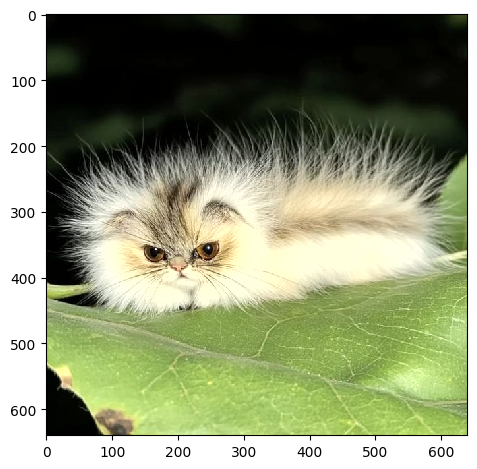

In [3]:
from skimage.io import imread, imshow, imsave

img = imread('image.jpg')

imshow(img);

from skimage import img_as_float, img_as_ubyte

img_f = img_as_float(img)

img_f.dtype

img_f

import numpy as np

r, g, b = np.dsplit(img_f, 3)

r.shape

y = 0.2126 * r + 0.7152 * g + 0.0722 * b
u = -0.0999 * r - 0.3360 * g + 0.4360 * b
v = 0.6150 * r - 0.5586 * g - 0.0563 * b
k = round(y.size * 0.05)

k

pixels = y.ravel().copy()
pixels.shape
pixels.sort()
pixels

min_p, max_p = pixels[k + 1], pixels[-(k + 1)]
min_p, max_p

y_contrast = (y - min_p) * (1 / (max_p - min_p))
y_contrast
y_contrast.min()
y_contrast.max()

y_contrast = np.clip(y_contrast, 0, 1)

r_new = y_contrast + 1.2803 * v
g_new = y_contrast - 0.2148 * u - 0.3805 * v
b_new = y_contrast + 2.1279 * u

img_contrast = np.dstack((r_new, g_new, b_new))
img_contrast.shape
img_contrast = np.clip(img_contrast, 0, 1)
img_contrast.min()
img_contrast.max()

img_final = img_as_ubyte(img_contrast)

img_final.min()
img_final.max()

imshow(img_final);

imsave('image-color-contrast.png', img_final)
